- Nurbs曲線
    - Non-Uniformed Rational Basis-Spline Curve
    - 非一様有理Bスプライン曲線
        - 非一様：ノットベクトルで曲線セグメントの区間幅を変化させられる
        - 有理：各制御点の基底関数が基底関数全体の総和で割られている
        - B-スプライン曲線：制御点についてノットベクトルを用いて定義されるなめらかな曲線
            - 制御点の一部を変更しても全体に影響が及ばない
            - 生成された曲線は必ずしも制御点を通るわけではない
            - 曲率が連続である

- 曲線はn+1個の制御点とウェイト、n+p+2個のノットからなるノットベクトルで定義される
    - p : 次数
    

## Bスプライン曲線の基本式
$$
S(u) = \sum^{p-1}_{i=0}P_{i}N_{i,n}(u)
$$

- p：次数
- q：階数　$q = p + 1$
- n：制御点数　$n = p + 1$
- u：ノットベクトル
    - ノットベクトル数 $m = p + q + 1$

## Bスプライン基底関数

$$
N_{i, 0}(t) =  \left\{\begin{array}{ll}
1  & (x_{i} \leq t \lt x_{i+1})\\
0  & otherwise
\end{array}\right.
\\
N_{i, k}(t) = \frac{t-x_{i}}{x_{i+k}-x_{i}} N_{i, k-1}(t) + \frac{x_{i+k+1} - t}{x_{i+k+1}-x_{i+1}}N_{i+1,k-1}(t)
$$

- t: パラメータ値
- i: 制御点インデックス
- k: 次数

### ノットベクトル
- $m$個の要素を持つノットベクトル$u$のは以下の関係式を満たさないといけない
$$
u_{0} \leq u_{1} \leq u_{2} \leq \cdots \leq u_{m-1}
$$

- ノットベクトルの作成方式として以下の2つがある
    - 一様ノットベクトル（Uniform Knot Vector）
        - ノットを均等な間隔で配置する方法で作成する
    - 一様ノットベクトル$u$の$j$番目のノットを$u_{j}$とすると、以下のように表せれる
$$
u_{j} = u_{0} + \frac{u_{m-1} - u_{0}}{m-1}j
$$


        

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def BSplineaBase(t, knots, i, k):
    if k == 0:
        if knots[i] <= t and t < knots[i+1]: 
            return 1
        else:
            return 0

    N1 = BSplineaBase(t, knots, i, k-1)
    #N2 = BSplineaBase(t, knots, i+1, k-1)
    print('-------------------')
    print('k : ', k, ' i : ', i)
    print('N1 >>> ', N1)
    #print('N2 >>> ', N2)
    print('-------------------')
    #Bases = [N1, N2]

    #elem_1st = (t - knots[i]) / (knots[i+k] - knots[i])
    #elem_2nd = (knots[i + k + 1] - t) / (knots[i + k + 1] - knots[i+1])
    return 0 #elem_1st * Bases[0] +  elem_2nd * Bases[1] 

def BSplinePoint(control_points, t, degree, knots):
    spline = 0
    for i, control_point in enumerate(control_points):
        Base = BSplineaBase(t, knots, i, degree)
        spline += control_point * Base
    return spline

def CreateUniformKnots(start, end, num):
    knots = []
    for i in range(num):
        knot = start + ( (end - start) / (num - 1) ) * i
        knots.append(knot)
    return knots

In [83]:
knots = CreateUniformKnots(0, 1, 9)
print(knots)

[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]


In [84]:
control_points = np.array([[0,0], [2, 4], [4, 4], [7, 1]])

In [85]:
BSplinePoint(control_points, 1, 3, knots)

aaaa
-------------------
k :  1  i :  0
N1 >>>  0
-------------------
-------------------
k :  2  i :  0
N1 >>>  0
-------------------
-------------------
k :  3  i :  0
N1 >>>  0
-------------------
aaaa
-------------------
k :  1  i :  1
N1 >>>  0
-------------------
-------------------
k :  2  i :  1
N1 >>>  0
-------------------
-------------------
k :  3  i :  1
N1 >>>  0
-------------------
aaaa
-------------------
k :  1  i :  2
N1 >>>  0
-------------------
-------------------
k :  2  i :  2
N1 >>>  0
-------------------
-------------------
k :  3  i :  2
N1 >>>  0
-------------------
aaaa
-------------------
k :  1  i :  3
N1 >>>  0
-------------------
-------------------
k :  2  i :  3
N1 >>>  0
-------------------
-------------------
k :  3  i :  3
N1 >>>  0
-------------------


array([0, 0])

In [61]:
params = np.arange(0.0, 1.0, 0.1, dtype=np.float32)
spline_points = []
for t in params:
    sp = BSplinePoint(control_points, t, 3, knots)
    spline_points.append(sp)
    print(sp)
#print(spline_points)

[0. 0.]
[0. 0.]
[0.07200001 0.14400002]
[0.87200016 1.70133362]
[2.40133343 3.65466672]
[4.16666667 3.5       ]
[5.54799996 1.76666623]
[2.9453338  0.45733343]
[0.25199988 0.03599998]
[0. 0.]


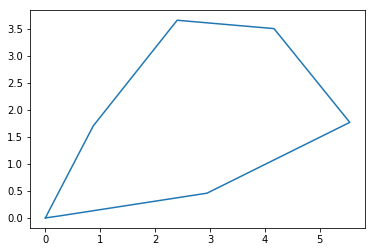

In [60]:
plt.plot([points[0] for points in spline_points], [points[1] for points in spline_points])